In [54]:
R.version
# install.packages('spls')

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [53]:
# install.packages("collections")

library('spls')
library('readxl')
library('collections')

# Sunduz Keles' paper: https://rss.onlinelibrary.wiley.com/doi/10.1111/j.1467-9868.2009.00723.x

# https://cran.r-project.org/web/packages/spls/vignettes/spls-example.pdf
# https://cran.r-project.org/web/packages/spls/spls.pdf

Warning message:
"package 'collections' was built under R version 3.6.3"
Attaching package: 'collections'

The following object is masked from 'package:utils':

    stack



### Notes from vignette
1. Predictors are centered and scaled automatically as part of pre-processing in spls
2. Input X as matrix and Y as matrix or vector
3. Hyperparameter tuning:
    1. eta = sparsity param
        - value between 0 and 1
    2. K = num. hidden components
        - Between 1 and min(p, (v-1)n/v)
    - Use v-fold CV function in cv.spls 
    -`set.seed(1)
    cv <- cv.spls( yeast$x, yeast$y, eta = seq(0.1,0.9,0.1), K = c(5:10) )`
    
4. Fitting
    - spls function does the fit
    - `fit <- spls( yeast$x, yeast$y, eta = cv$eta.opt, K = cv$K.opt )`
    - spls prints out variables that enter the set of selected variables at each iteration step of fitting.
    - `print.spls` displays parameters used, num. predictors and list of predictors
    - `coef(fit)` prints out the coefficient estimates

5. Coef path plot
    - `plot.spls(f, yvar=1)`
    
__In the yeast cell cycle data [Example used in vignette], the responses were repeatedly measured at different time points.__
In this case, it is useful to visualize how the estimated coefficients change as a function of time.
The function ‘coefplot.spls’ plots the estimated coefficients of the fit obtained from the ‘spls’
function across all the responses.

In [27]:
data(yeast)
(yeast$x)
yeast$y

,ABF1_YPD,ACE2_YPD,ADR1_YPD,ARG80_YPD,ARG81_YPD,ARO80_YPD,ASH1_YPD,AZF1_YPD,BAS1_YPD,CAD1_YPD,...,UGA3_YPD,YAP1_YPD,YAP3_YPD,YAP5_YPD,YAP6_YPD,YAP7_YPD,YFL044C_YPD,YJL206C_YPD,ZAP1_YPD,ZMS1_YPD
21,-0.272273021,0.219322937,0.9238359567,-0.475575615,-0.10389318,0.2684020538,0.242154919,-0.086738577,-0.2576373559,0.144634164,...,-0.406067794,-0.25571576,0.148216319,0.615101262,3.874595e-01,-0.7690857522,0.91080587,0.48183221,-0.358274829,-0.019354076
41,0.169128029,0.538311983,0.0097604993,-0.321953432,-0.19750606,-0.0191319878,0.687699365,0.138874089,-0.1335776877,-0.735599624,...,-0.986433262,-0.18086054,0.013226979,-0.642500626,2.490926e-02,-0.4573304557,-0.25902208,-0.23575669,-0.383033883,0.211907571
71,-0.138896200,0.026363822,0.0877516229,-0.223409276,0.10307741,0.3214393424,-0.171224968,0.425708505,0.1071858178,0.096391811,...,0.828472113,0.17842821,-0.006725961,0.105255263,-5.787689e-02,0.4416244489,0.85500793,-0.03926345,0.286199727,0.238056769
78,-0.286516858,-0.314094270,-0.0454998435,0.326221738,0.27757502,-0.0317175012,0.257551497,-0.014661977,0.0616182009,0.003613174,...,-2.135487947,-0.52453268,0.034463376,-0.377618708,3.586077e-02,-0.4860690242,-0.03762481,0.07295395,-0.036167940,0.150705368
102,-0.495056114,-0.148274190,0.0002987512,-0.217945828,-0.02539585,-0.2515847107,0.263647902,0.190925299,-0.0001811129,-0.211715962,...,-1.222013658,0.01964698,0.062165932,-0.416812933,5.337454e-02,-0.4951472291,-0.35444051,0.09640220,0.009643994,0.539917029
106,-0.160078262,-0.534380704,-0.0762426763,-0.003138850,0.15052029,0.0072565096,0.413633832,0.159577651,0.1748477888,-0.561663048,...,-0.879180554,0.57013627,-0.339223827,-0.681928289,5.384423e-01,-0.4187082842,-0.57661333,-0.05569781,0.090434514,0.553884104
107,-0.160078262,-0.534380704,-0.0762426763,-0.003138850,0.15052029,0.0072565096,0.413633832,0.159577651,0.1748477888,-0.561663048,...,-0.879180554,0.57013627,-0.339223827,-0.681928289,5.384423e-01,-0.4187082842,-0.57661333,-0.05569781,0.090434514,0.553884104
136,0.357042059,-0.402079621,0.1350669851,-0.587817395,-0.29032284,-0.0697538489,0.495677973,0.051935704,-0.3722889741,-0.388217123,...,-1.242254835,-0.64913836,-0.323575078,-0.513131878,1.005579e+00,-0.1146162011,-0.56973740,-0.49882836,-0.275869699,0.481338109
158,-0.052456564,0.260383183,0.0608546518,-0.176799930,-0.10878565,-0.0019623750,-0.033218692,0.257249881,0.0726635576,-0.007561527,...,-0.805245578,-0.67093801,0.295487355,0.803795322,-1.416249e-01,0.0007967247,-0.17687493,0.02937160,0.083038770,0.301258686
168,-0.064340936,0.556953473,0.4160845879,0.290826250,0.03905541,-0.0071430528,-0.017261212,0.208993876,-0.1542338291,0.166068047,...,0.215696983,0.19700719,-0.058026905,0.012305925,1.124071e-02,-0.8576207820,0.09410511,0.08690521,-0.148106879,-0.422436924


,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,alpha56,alpha63,alpha70,alpha77,alpha84,alpha91,alpha98,alpha105,alpha112,alpha119
1,-0.36,-0.42,0.29,-0.14,-0.19,-0.52,0.04,0.04,0.37,0.24,0.13,0.22,0.04,-0.24,-0.22,-0.10,0.22,0.61
2,1.04,0.19,0.47,-1.03,-0.63,-0.68,0.10,-0.02,0.53,0.68,0.51,-0.20,-0.34,-0.59,-0.31,-0.25,0.11,0.44
5,-0.30,-0.45,0.75,0.37,0.27,-0.28,-0.16,-0.13,-0.56,-0.28,0.11,0.30,0.22,0.08,0.07,-0.02,0.11,-0.10
8,-0.46,0.12,-0.06,-0.76,-0.70,-0.79,-0.20,-0.06,0.82,0.36,0.68,-0.13,0.20,-0.32,0.04,0.57,0.17,0.53
9,-1.35,-0.86,-0.22,-0.38,-0.65,-0.79,0.02,0.60,1.38,1.59,1.03,0.99,0.11,-0.39,-0.86,-0.41,-0.20,0.41
10,-2.06,-1.98,-1.64,-0.21,1.21,0.69,0.85,0.43,-0.32,-0.77,-1.10,-0.02,0.88,1.30,1.29,1.29,0.16,0.00
11,-1.61,-2.55,-1.09,-0.55,0.98,1.14,0.90,0.43,-0.41,-0.38,-1.18,-0.16,0.77,1.27,1.17,1.30,0.05,-0.09
14,-0.07,-0.46,0.41,0.16,0.58,-0.07,0.45,0.04,0.07,-0.07,-0.08,-0.28,-0.09,-0.08,0.16,-0.35,0.02,-0.35
16,0.11,-0.54,-0.45,-0.23,-0.14,0.39,0.15,0.15,0.02,0.17,-0.38,-0.14,-0.06,0.17,0.11,0.07,0.37,0.23
17,0.15,-0.07,-0.09,0.00,0.02,-0.46,-0.11,-0.14,-0.02,0.03,-0.03,0.41,0.13,0.11,0.10,0.03,-0.12,0.05


eta = 0.1 
eta = 0.2 
eta = 0.3 
eta = 0.4 
eta = 0.5 
eta = 0.6 
eta = 0.7 
eta = 0.8 
eta = 0.9 

Optimal parameters: eta = 0.6, K = 8


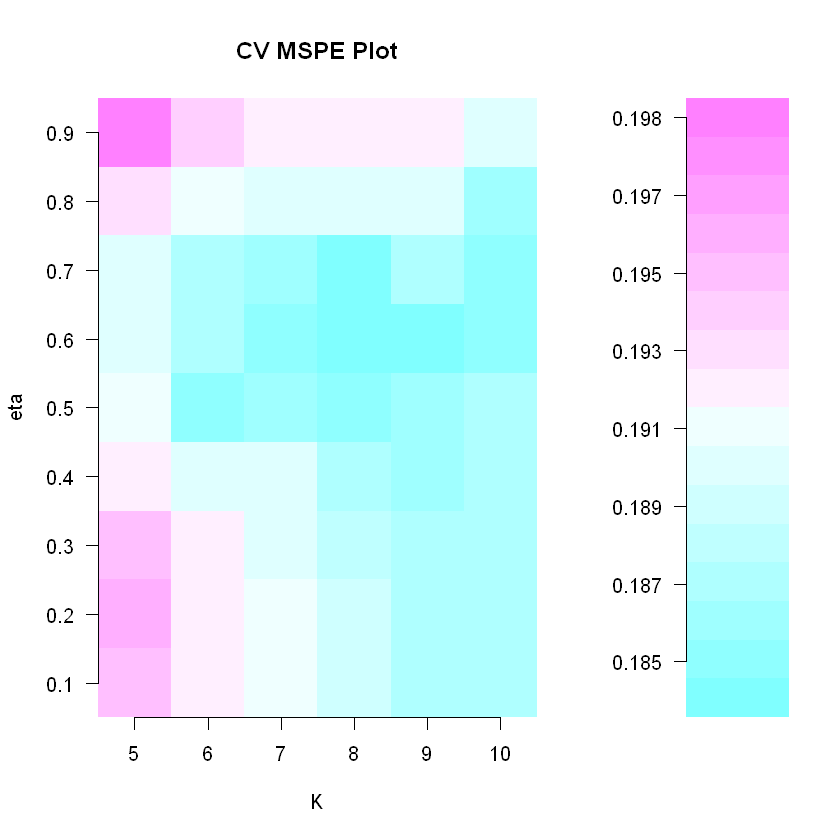

In [28]:
# This CV on the yeast data takes about 15 seconds. 
set.seed(1)
cv <- cv.spls(yeast$x, yeast$y, eta = seq(0.1,0.9,0.1), K = c(5:10))

In [34]:
f <- spls( yeast$x, yeast$y, eta = cv$eta.opt, K = cv$K.opt )

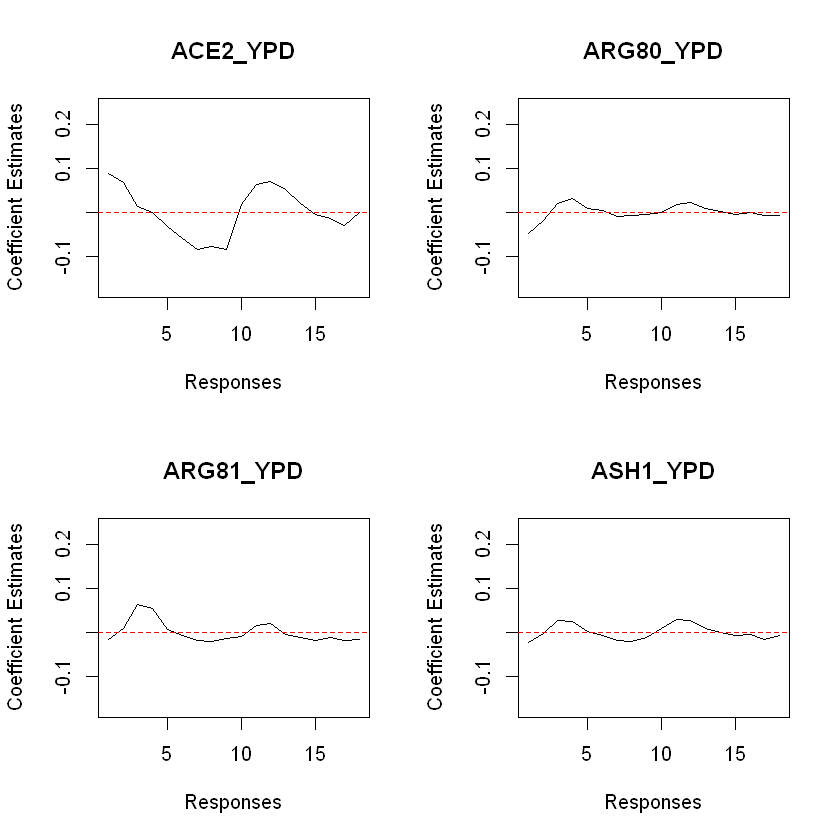

In [38]:
coefplot.spls( f, nwin=c(2,2), xvar=c(1:4) )

## Wrangling data into R

In [83]:


data <- read_excel("..\\data\\processed\\combined_metabolites_data.xlsx")

animals_used <- c(1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101)
diabetic <-     c(1076, 1082, 1101)
impaired <-     c(1060, 1062, 1074, 1092, 1102)
normal  <-      c(1091, 1093)
# animal_tol = {
#     1076: 'diabetic', 1082: 'diabetic', 1101: 'diabetic', 1060: 'impaired', 1062: 'impaired', 
#     1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal'}
ap <- read_excel('..\\data\\metadata\\animal_phenotypes.xlsx')
rownames(ap) <- ap$animal
fg <- read.csv('..\\data\\metadata\\combined_metab_lipid_file_grouping.csv')




Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1031 / R1031C7: '772.27353'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1031 / R1031C8: '1.358'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1031 / R1031C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1032 / R1032C7: '509.32935'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1032 / R1032C8: '1.373'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1032 / R1032C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1033 / R1033C7: '754.59748'"W

"Coercing text to numeric in G1050 / R1050C7: '690.61818'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1050 / R1050C8: '1.414'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1050 / R1050C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1051 / R1051C7: '666.61807'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1051 / R1051C8: '1.422'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1051 / R1051C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1052 / R1052C7: '239.05902'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"

"Coercing text to numeric in H1069 / R1069C8: '1.57'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1069 / R1069C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1070 / R1070C7: '301.21667'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1070 / R1070C8: '1.584'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1070 / R1070C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1071 / R1071C7: '269.24818'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1071 / R1071C8: '1.587'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expec

"Expecting logical in K1088 / R1088C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1089 / R1089C7: '742.57384'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1089 / R1089C8: '1.649'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1089 / R1089C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1090 / R1090C7: '816.57493'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1090 / R1090C8: '1.653'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1090 / R1090C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coer

"Coercing text to numeric in G1108 / R1108C7: '828.53985'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1108 / R1108C8: '1.699'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1108 / R1108C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1109 / R1109C7: '309.20657'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1109 / R1109C8: '1.7'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1109 / R1109C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1110 / R1110C7: '827.59129'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Coercing text to numeric in H1127 / R1127C8: '1.859'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1127 / R1127C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1128 / R1128C7: '271.22732'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1128 / R1128C8: '1.867'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1128 / R1128C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1129 / R1129C7: '80.05006'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1129 / R1129C8: '1.899'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expec

"Expecting logical in K1146 / R1146C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1147 / R1147C7: '114.05492'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1147 / R1147C8: '10.141'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1147 / R1147C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1148 / R1148C7: '215.02773'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1148 / R1148C8: '10.142'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1148 / R1148C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Expecting logical in K1164 / R1164C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1165 / R1165C7: '213.01203'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1165 / R1165C8: '10.86'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1165 / R1165C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1166 / R1166C7: '238.0925'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1166 / R1166C8: '10.861'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1166 / R1166C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coer

"Coercing text to numeric in H1183 / R1183C8: '11.413'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1183 / R1183C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1184 / R1184C7: '445.16485'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1184 / R1184C8: '11.414'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1184 / R1184C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1185 / R1185C7: '255.07155'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1185 / R1185C8: '11.432'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"E

"Expecting logical in K1202 / R1202C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1203 / R1203C7: '179.05517'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1203 / R1203C8: '11.565'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1203 / R1203C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1204 / R1204C7: '161.04456'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1204 / R1204C8: '11.569'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1204 / R1204C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Coercing text to numeric in H1222 / R1222C8: '11.719'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1222 / R1222C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1223 / R1223C7: '343.16453'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1223 / R1223C8: '11.722'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1223 / R1223C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1224 / R1224C7: '136.04822'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1224 / R1224C8: '11.733'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"E

"Expecting logical in K1240 / R1240C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1241 / R1241C7: '200.05313'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1241 / R1241C8: '12.067'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1241 / R1241C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1242 / R1242C7: '120.06577'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1242 / R1242C8: '12.071'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1242 / R1242C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Coercing text to numeric in G1260 / R1260C7: '138.87438'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1260 / R1260C8: '12.595'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1260 / R1260C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1261 / R1261C7: '169.98582'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1261 / R1261C8: '12.595'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1261 / R1261C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1262 / R1262C7: '124.0063'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :


"Expecting logical in K1278 / R1278C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1279 / R1279C7: '311.91137'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1279 / R1279C8: '12.715'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1279 / R1279C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1280 / R1280C7: '234.09711'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1280 / R1280C8: '12.718'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1280 / R1280C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Coercing text to numeric in G1298 / R1298C7: '175.95224'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1298 / R1298C8: '12.75'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1298 / R1298C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1299 / R1299C7: '211.92936'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1299 / R1299C8: '12.754'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1299 / R1299C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1300 / R1300C7: '370.86664'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :


"Coercing text to numeric in H1317 / R1317C8: '12.808'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1317 / R1317C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1318 / R1318C7: '321.9654'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1318 / R1318C8: '12.81'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1318 / R1318C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1319 / R1319C7: '203.06647'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1319 / R1319C8: '12.812'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Exp

"Expecting logical in K1336 / R1336C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1337 / R1337C7: '159.0765'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1337 / R1337C8: '13.082'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1337 / R1337C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1338 / R1338C7: '198.08498'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1338 / R1338C8: '13.084'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1338 / R1338C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coe

"Coercing text to numeric in H1355 / R1355C8: '13.711'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1355 / R1355C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1356 / R1356C7: '178.00873'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1356 / R1356C8: '13.711'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1356 / R1356C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1357 / R1357C7: '286.05963'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1357 / R1357C8: '13.733'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"E

"Expecting logical in K1374 / R1374C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1375 / R1375C7: '293.09785'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1375 / R1375C8: '14.216'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1375 / R1375C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1376 / R1376C7: '143.08154'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1376 / R1376C8: '14.216'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1376 / R1376C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Coercing text to numeric in G1394 / R1394C7: '448.98732'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1394 / R1394C8: '14.616'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1394 / R1394C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1395 / R1395C7: '366.98522'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1395 / R1395C8: '14.641'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1395 / R1395C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1396 / R1396C7: '355.9951'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :


"Coercing text to numeric in H1413 / R1413C8: '15.072'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1413 / R1413C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1414 / R1414C7: '290.88351'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1414 / R1414C8: '15.397'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1414 / R1414C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1415 / R1415C7: '372.82925'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1415 / R1415C8: '15.399'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"E

"Expecting logical in K1432 / R1432C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1433 / R1433C7: '512.87439'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1433 / R1433C8: '15.699'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1433 / R1433C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1434 / R1434C7: '532.92377'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1434 / R1434C8: '15.724'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1434 / R1434C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Co

"Coercing text to numeric in G1452 / R1452C7: '758.88319'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1452 / R1452C8: '15.899'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1452 / R1452C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1453 / R1453C7: '696.93021'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1453 / R1453C8: '15.911'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1453 / R1453C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1454 / R1454C7: '258.93574'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :

"Coercing text to numeric in H1471 / R1471C8: '16.053'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1471 / R1471C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1472 / R1472C7: '726.93545'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1472 / R1472C8: '16.057'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1472 / R1472C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1473 / R1473C7: '582.97899'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1473 / R1473C8: '16.071'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"E

"Expecting logical in K1490 / R1490C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1491 / R1491C7: '530.9817'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1491 / R1491C8: '16.224'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1491 / R1491C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1492 / R1492C7: '612.98461'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1492 / R1492C8: '16.228'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1492 / R1492C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coe

"Coercing text to numeric in G1510 / R1510C7: '633.03422'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1510 / R1510C8: '16.58'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1510 / R1510C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1511 / R1511C7: '305.02228'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1511 / R1511C8: '16.58'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1511 / R1511C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1512 / R1512C7: '433.00458'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"

"Coercing text to numeric in H1529 / R1529C8: '16.785'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1529 / R1529C11: got '[M+Na]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1530 / R1530C7: '96.95901'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1530 / R1530C8: '16.785'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1530 / R1530C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1531 / R1531C7: '128.95366'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1531 / R1531C8: '16.981'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"E

"Expecting logical in K1547 / R1547C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1548 / R1548C7: '114.09166'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1548 / R1548C8: '2.087'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1548 / R1548C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1549 / R1549C7: '157.12239'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1549 / R1549C8: '2.094'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1549 / R1549C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coer

"Coercing text to numeric in G1567 / R1567C7: '400.34183'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1567 / R1567C8: '2.316'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1567 / R1567C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1568 / R1568C7: '582.37655'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1568 / R1568C8: '2.324'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1568 / R1568C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1569 / R1569C7: '562.32695'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"

"Coercing text to numeric in H1586 / R1586C8: '2.537'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1586 / R1586C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1587 / R1587C7: '578.39295'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1587 / R1587C8: '2.54'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1587 / R1587C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1588 / R1588C7: '504.30845'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1588 / R1588C8: '2.545'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expec

"Expecting logical in K1605 / R1605C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1606 / R1606C7: '535.31435'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1606 / R1606C8: '2.687'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1606 / R1606C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1607 / R1607C7: '455.31574'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1607 / R1607C8: '2.698'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1607 / R1607C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coer

"Expecting logical in K1624 / R1624C11: got '[M+Na]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1625 / R1625C7: '540.36605'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1625 / R1625C8: '2.831'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1625 / R1625C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1626 / R1626C7: '538.35142'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1626 / R1626C8: '2.841'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1626 / R1626C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coe

"Coercing text to numeric in G1644 / R1644C7: '150.11257'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1644 / R1644C8: '4.263'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1644 / R1644C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1645 / R1645C7: '102.12817'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1645 / R1645C8: '4.265'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1645 / R1645C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1646 / R1646C7: '74.09707'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"C

"Coercing text to numeric in H1663 / R1663C8: '7.453'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1663 / R1663C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1664 / R1664C7: '245.07719'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1664 / R1664C8: '7.509'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1664 / R1664C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1665 / R1665C7: '243.06152'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1665 / R1665C8: '7.513'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expe

"Coercing text to numeric in H1682 / R1682C8: '8.574'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1682 / R1682C11: got '[M+H]+1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1683 / R1683C7: '229.04342'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1683 / R1683C8: '8.657'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1683 / R1683C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1684 / R1684C7: '103.03894'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1684 / R1684C8: '8.672'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expe

"Coercing text to numeric in H1700 / R1700C8: '9.025'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1700 / R1700C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1701 / R1701C7: '294.0929'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1701 / R1701C8: '9.029'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1701 / R1701C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1702 / R1702C7: '212.08955'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1702 / R1702C8: '9.036'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expec

"Coercing text to numeric in H1719 / R1719C8: '9.841'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1719 / R1719C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1720 / R1720C7: '203.0817'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1720 / R1720C8: '9.861'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting logical in K1720 / R1720C11: got '[M-H]-1'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in G1721 / R1721C7: '188.07065'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing text to numeric in H1721 / R1721C8: '9.866'"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expec

In [98]:
data_cols <- grep(pattern='(BG_)', x=colnames(ap), value=TRUE)
data_cols

character(0)

In [90]:
data_cols

integer(0)

In [ ]:
X_all <- filter(data, )



In [ ]:
X_all_centered = pd.DataFrame(StandardScaler(with_std=False).fit_transform(data[data_cols].T), 
                     index=data_cols, columns=data.index)
X_all_zscore = pd.DataFrame(StandardScaler().fit_transform(data[data_cols].T), index=data_cols, columns=data.index)

X_all = data[data_cols].T


y_3class = fg['gluc_tol']                                                 # ['normal', 'impaired', 'diabetic']
y_3class_num = y_3class.map({'normal': 0, 'impaired': 1, 'diabetic': 2})  # [0, 1, 2]
y_bg = fg['bg']                                                           # random/fasted blood glucoose
y_ogtt = fg['animal'].map(ap['OGTT (AUC)'])
y_weight = fg['animal'].map(ap['Weightprefastweek12'])
y_insulin = fg['animal'].map(ap['Insulin (AUC)'])

In [85]:
is.data.frame(ap)

[1] TRUE

In [79]:
ap <- as.data.frame(ap)


In [101]:
ap[ap$animal == 1060]

ERROR: Error: Must extract column with a single valid subscript.
x Subscript `ap$animal == 1060` has the wrong type `logical`.
i It must be numeric or character.


In [78]:
is.double(ap$animal)

[1] TRUE

In [72]:
ap

animal,Date of birth,litter,lcms_sampled,glucose_tolerance,OGTT(0min),OGTT(10min),OGTT(20min),OGTT(30min),OGTT(60min),...,Weightprefastweek12,HbA1c,Interscapular brown fat (g),BF (%BW),Inguinal white fat one side (g),WF (%BW),BF/WF,Plasma,Fatty liver,Notes
1060,2021-01-23,0,TRUE,impaired,58.5,178.0,314.5,551.0,589.0,...,105.1,NA,2.0448,1.9455756,0.7185,0.6836346,2.845929,murky,No,NA
1061,2021-01-23,0,FALSE,NA,48.0,196.5,344.5,449.5,518.0,...,101.7,NA,1.7808,1.7510324,0.6059,0.5957719,2.939099,murky,Slight,NA
1062,2021-01-23,0,TRUE,impaired,56.5,219.0,334.0,462.0,511.0,...,109.1,NA,2.5185,2.3084326,0.7439,0.6818515,3.385536,murky,No,NA
1063,2021-01-23,0,FALSE,NA,NA,NA,NA,NA,NA,...,109.2,NA,2.5485,2.3337912,0.8614,0.7888278,2.958556,NA,No,OGTT failed Didn't collect tissue or post-OGTT blood
1074,2021-01-23,0,TRUE,impaired,38.5,160.0,308.0,368.0,445.5,...,110.4,NA,2.5060,2.2699275,0.7164,0.6489130,3.498046,murky,Slight,NA
1075,2021-01-23,0,FALSE,NA,169.0,355.0,600.0,600.0,569.5,...,105.5,NA,1.3107,1.2423697,0.5910,0.5601896,2.217766,White,Yes,NA
1076,2021-01-23,0,TRUE,diabetic,138.0,352.5,513.5,585.0,600.0,...,112.1,NA,1.4332,1.2785013,0.6960,0.6208742,2.059195,White,Slight,NA
1080,2021-01-24,1,FALSE,NA,NA,NA,NA,NA,NA,...,112.1,NA,1.9369,1.7278323,0.7754,0.6917038,2.497937,NA,No,OGTT failed Didn't collect tissue or post-OGTT blood
1081,2021-01-24,1,FALSE,NA,171.0,345.0,547.0,600.0,563.0,...,113.2,NA,1.3511,1.1935512,0.6283,0.5550353,2.150406,White,No,NA
1082,2021-01-24,1,TRUE,diabetic,62.0,258.0,600.0,600.0,571.5,...,108.8,NA,0.8904,0.8183824,0.6515,0.5988051,1.366692,White,Yes,NA


In [60]:
colnames(fg)

[1] "combined_col_name"   "animal"              "litter"             
 [4] "gluc_tol"            "bg_type"             "week"               
 [7] "ogtt"                "bg"                  "File.Name_lipid"    
[10] "lipid_run_order"     "fr_name"             "lipidex_file_number"
[13] "date"                "File.Name_metab"     "metab_run_order"    
[16] "fixed_filename"      "qc_file"             "blank_file"         
[19] "quant_file"

In [48]:
head(data, 20)

Unique ID,Type,i,Proposed ID,Found in Tracefinder,Compound Class,m/z,RT [min],Area (Max.),Score,...,1092_10_FBG,1082_8_RBG,1062_8_RBG,1102_10_FBG,1093_8_RBG,1074_9_FBG,1062_9_RBG,1101_8_RBG,1092_8_RBG,1092_10_RBG
unknown_679.05463_0.536,lipid,l_0,unknown,NA,unknown,679.0546,0.536,24.52158,NA,...,22.46225,23.36092,22.39915,23.16342,22.73784,22.11653,23.35245,23.52744,23.85869,23.61755
unknown_641.1087_0.537,lipid,l_1,unknown,NA,unknown,641.1087,0.537,25.71875,NA,...,24.66385,23.70039,23.38232,24.38557,23.78967,22.24876,22.51325,24.55808,24.81852,24.57590
unknown_951.15973_0.541,lipid,l_2,unknown,NA,unknown,951.1597,0.541,24.94865,NA,...,23.45263,22.54998,23.24935,23.68098,23.98959,23.52751,24.00257,23.88620,24.06914,23.45579
unknown_329.03067_0.542,lipid,l_3,unknown,NA,unknown,329.0307,0.542,28.10288,NA,...,27.21067,26.19495,26.91112,26.80600,26.14510,26.63840,27.21739,26.97043,27.17527,26.48271
unknown_969.13147_0.544,lipid,l_4,unknown,NA,unknown,969.1315,0.544,24.01673,NA,...,22.60221,21.90551,22.22657,22.48567,22.20816,22.23611,23.15136,22.82382,21.75059,22.04703
unknown_623.13641_0.546,lipid,l_5,unknown,NA,unknown,623.1364,0.546,27.58312,NA,...,26.35560,25.07183,25.23934,26.56718,25.53856,25.40853,25.50465,26.51923,26.37478,26.55369
unknown_291.08359_0.551,lipid,l_6,unknown,NA,unknown,291.0836,0.551,31.97946,NA,...,29.98895,29.06901,29.92780,29.99959,28.92777,29.73369,30.03453,29.73440,29.97546,29.42879
unknown_352.99652_0.553,lipid,l_7,unknown,NA,unknown,352.9965,0.553,23.28041,NA,...,22.76752,21.29689,22.06037,21.88118,21.83285,21.87412,22.29789,22.35400,22.07084,21.72150
unknown_247.09372_0.554,lipid,l_8,unknown,NA,unknown,247.0937,0.554,27.17043,NA,...,25.93764,25.09711,25.89100,26.05225,24.97238,25.74502,26.15880,25.74712,26.16110,25.22389
unknown_605.14441_0.555,lipid,l_9,unknown,NA,unknown,605.1444,0.555,25.58222,NA,...,23.55760,21.44448,23.31713,23.79621,22.86693,23.50850,23.66019,23.43220,23.98650,22.92256


In [ ]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile)

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic =     [1076, 1082, 1101]
impaired =     [1060, 1062, 1074, 1092, 1102]
normal =       [1091, 1093]
animal_tol = {
    1076: 'diabetic', 1082: 'diabetic', 1101: 'diabetic', 1060: 'impaired', 1062: 'impaired', 
    1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal'}
ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)

fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

# Use data that was sent to collaborators 
data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')